<a href="https://colab.research.google.com/github/MachukaJoy/NLP_with_Disaster_Tweets/blob/main/Module9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_path = '/content/drive/Shared drives/module_9_project/train.csv'
test_path = '/content/drive/Shared drives/module_9_project/test.csv'

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Previewing Data

In [22]:
df_train = pd.read_csv(train_path)
df_train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [23]:
df_test = pd.read_csv(test_path)
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [24]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


# Data Cleaning

In [25]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


In [26]:
# fill missing values with 'unknown' since missing values are in keyword and location columns
df_train['keyword'] = df_train['keyword'].fillna('unknown')
df_train['location'] = df_train['location'].fillna('unknown')
# confirm missing values are gone
print(df_train.isnull().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [27]:
# fill missing values with 'unknown' since missing values are in keyword and location columns
df_test['keyword'] = df_train['keyword'].fillna('unknown')
df_test['location'] = df_train['location'].fillna('unknown')
# confirm missing values are gone
print(df_test.isnull().sum())

id          0
keyword     0
location    0
text        0
dtype: int64


In [29]:
# check for duplicated values
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [39]:
# Count occurrences of each location
location_counts = df_train['location'].value_counts()

# Display the counts
print(location_counts)

# Counts as a DataFrame
location_counts_df = location_counts.reset_index()
location_counts_df.columns = ['Location', 'Count']

# Display the top 10 locations
print(location_counts_df.head(50))

location
unknown                         2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3342, dtype: int64
             Location  Count
0             unknown   2533
1                 USA    104
2            New York     71
3       United States     50
4              London     45
5              Canada     29
6             Nigeria     28
7                  UK     27
8     Los Angeles, CA     26
9               India     24
10             Mumbai     22
11     Washington, DC     21
12              Kenya     20
13          Worldwide     19
14        Chicago, IL     18
15          Australia     18
16         California     17
17       New York, NY 

We see the location column needs a lot of cleaning for instance we have New york, New York City, New York, NY, NYC and probably others. We will therefore proceed to drop the column together with id column

# Text Preprocessing

In [40]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [41]:
# Download required NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [43]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [44]:
# Preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)

# Exploraratory Data Analysis

In [45]:
from wordcloud import WordCloud

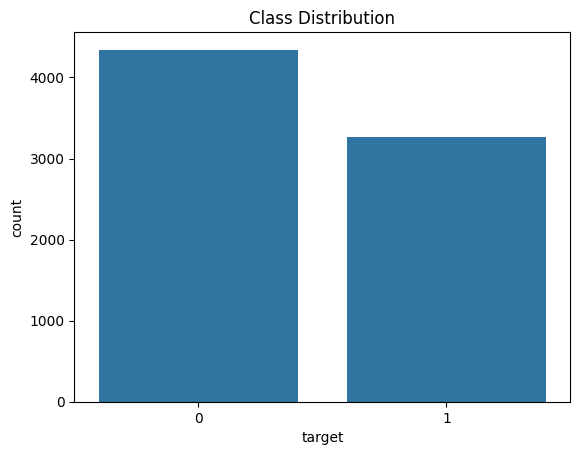

In [46]:
# Class distribution
sns.countplot(data=df_train, x='target')
plt.title('Class Distribution')
plt.show()

In [47]:
# Most frequent keywords
print(df_train[df_train['target'] == 1]['keyword'].value_counts().head(10))
print(df_train[df_train['target'] == 0]['keyword'].value_counts().head(10))

keyword
unknown              42
wreckage             39
outbreak             39
derailment           39
typhoon              37
debris               37
oil%20spill          37
rescuers             32
suicide%20bombing    32
suicide%20bomb       32
Name: count, dtype: int64
keyword
body%20bags    40
harm           37
armageddon     37
deluge         36
ruin           36
wrecked        36
twister        35
explode        35
fear           35
siren          35
Name: count, dtype: int64


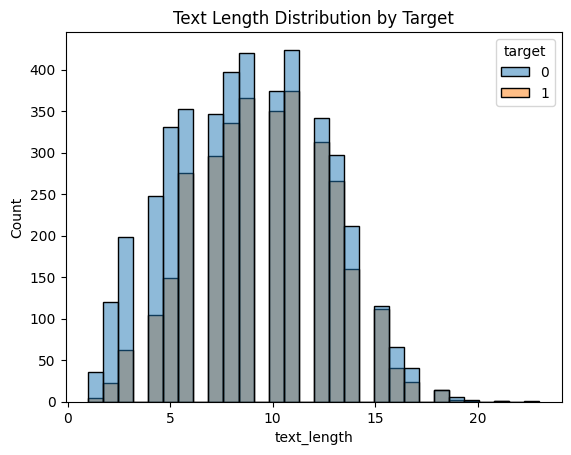

In [48]:
# Text length analysis
df_train['text_length'] = df_train['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(data=df_train, x='text_length', hue='target', bins=30)
plt.title('Text Length Distribution by Target')
plt.show()

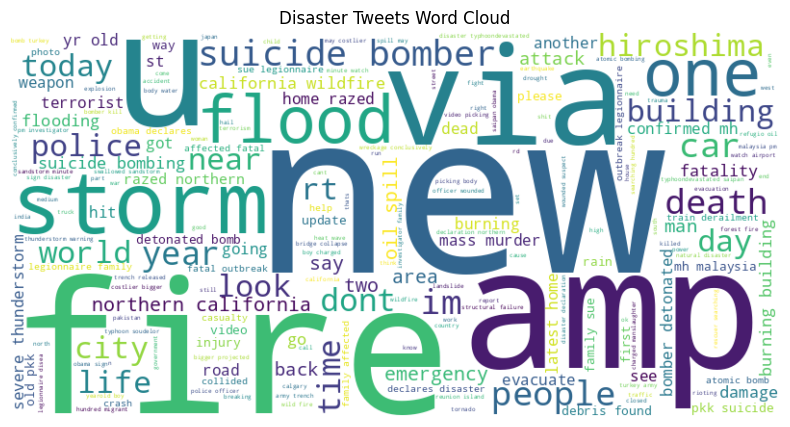

In [49]:
# Word Cloud
disaster_words = ' '.join(df_train[df_train['target'] == 1]['clean_text'])
non_disaster_words = ' '.join(df_train[df_train['target'] == 0]['clean_text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(disaster_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Disaster Tweets Word Cloud')
plt.show()

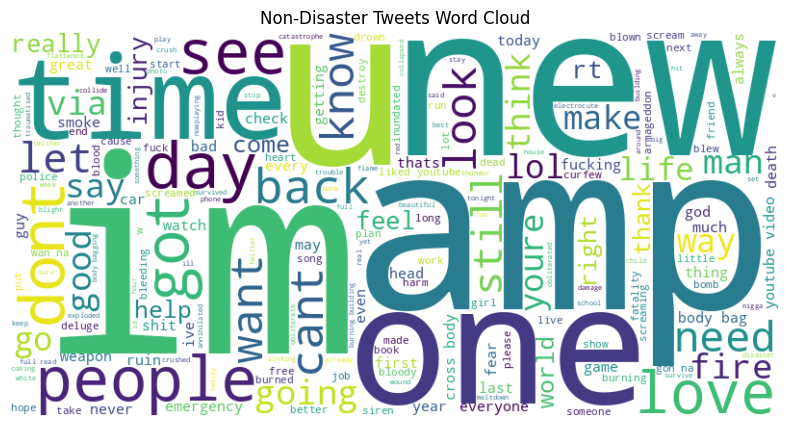

In [50]:
wc = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Disaster Tweets Word Cloud')
plt.show()

# Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform text data
X_train = vectorizer.fit_transform(df_train['clean_text']).toarray()
X_test = vectorizer.transform(df_test['clean_text']).toarray()

# Target variable
y_train = df_train['target']